In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


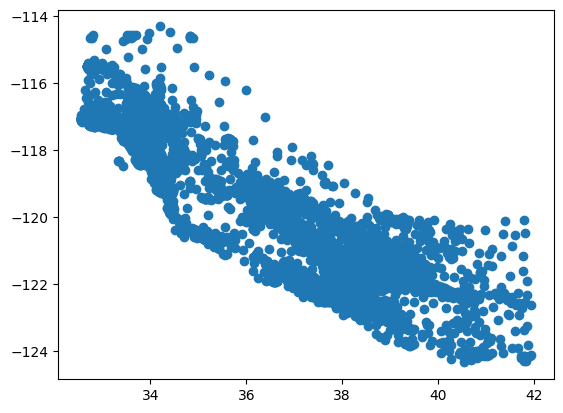

In [ ]:
data = data.loc[:, ['latitude', 'longitude']]
plt.scatter(data.latitude, data.longitude)

In [ ]:
data = np.array(data)

In [ ]:
k = 5
m = 3

U = np.random.rand(data.shape[0], k)
U /= np.sum(U, axis =1 )[:, np.newaxis]
U

array([[0.44451589, 0.17993065, 0.05207934, 0.12624714, 0.19722698],
       [0.06594633, 0.46635624, 0.10461983, 0.01276566, 0.35031194],
       [0.00447603, 0.17737634, 0.38008425, 0.18880134, 0.24926204],
       ...,
       [0.32385481, 0.18666075, 0.01283945, 0.1423563 , 0.33428868],
       [0.25898315, 0.31172903, 0.26971025, 0.06751225, 0.09206531],
       [0.20038463, 0.19533951, 0.15493048, 0.2528823 , 0.19646307]])

In [ ]:
def calculate_centroid (data, K, U, m):
    Centroids=np.zeros((K,data.shape[1]))
    for i in range (K):
        Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*data, axis=0)/np.sum(U[:,i]**m)
    return Centroids

In [ ]:
def calculate_membership (data, Centroids, K , m):
    U_new=np.zeros((data.shape[0],K))
    for i in range (K):
        U_new[:,i]=np.linalg.norm(data-Centroids[i,:],axis=1)

    U_new=1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [ ]:

labels=np.argmax(U_new, axis=1)
labels

NameError: ignored